In [104]:
import os
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from core.result_reader import combine_run_experiments, combine_run_training_logs

RESULT_DIR = "../_report_results"
#dirs = os.listdir(RESULT_DIR)
#dirs = sorted(dirs)
#print(dirs)
#selected_dir = "220410_004903" , "220419_005850"
selected_dir = RESULT_DIR
print(selected_dir)

../_report_results


In [105]:
df = combine_run_experiments(RESULT_DIR)

for col in ["train", "test", "val"]:
    df[f"{col}_err"] = 1 - df[f"{col}_acc"]

df["hour_trained"] = df["train_time"] / 3600
df["model_name"] = df.exp_name.apply(lambda x: x.split("_")[0])
df["model_size"] = df.exp_name.apply(lambda x: int(x.split("_")[1]))
df["batch_size"] = df.exp_name.apply(lambda x: int(x.split("_")[2]))
df["learning_rate"] = df.exp_name.apply(lambda x: float(x.split("_")[3]))

In [106]:
cols = [
    "model_name", 
    "model_size", 
    "batch_size", 
    "learning_rate", 
    "train_err", 
    "val_err", 
    "val_acc",
    "test_err",
    "test_acc",
    "hour_trained"
]

### ResNet vs DsNet vs DenseNet

In [161]:
# Res vs Ds vs Dense
df2 = df[(df["batch_size"]==32) & (df["learning_rate"]==0.1)].sort_values(["model_size", "hour_trained"])[cols]
df2 = df2[df2.model_size != 12]
df2 = df2[df2.model_name != "ResNet"]
df2 = df2[df2.model_name != "DsNet"]

maryam_result = [
    {"model_name": "ResNet", "model_size": 3, "train_acc": 0.76654, "val_acc": 0.619, "test_acc": 0.6124, "hour_trained": 0.907521},
    {"model_name": "ResNet", "model_size": 8, "train_acc": 0.87456, "val_acc": 0.6394, "test_acc": 0.6326, "hour_trained": 1.509368},        
    {"model_name": "ResNet", "model_size": 16, "train_acc": 0.89456, "val_acc": 0.6058, "test_acc": 0.6146, "hour_trained": 102.24406*100/3600},
    {"model_name": "DsNet", "model_size": 3, "train_acc": 0.80172, "val_acc": 0.6742, "test_acc": 0.6214, "hour_trained": 1.234748},
    {"model_name": "DsNet", "model_size": 8, "train_acc": 0.90406, "val_acc": 0.6382, "test_acc": 0.6406, "hour_trained": 3.129933},            
    {"model_name": "DsNet", "model_size": 16, "train_acc": 0.96464, "val_acc": 0.6756, "test_acc": 0.671, "hour_trained": 286.55164*100/3600},    
]

df3 = df2.append(maryam_result).reset_index().drop("index", axis=1)
df3

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3557442465.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df2.append(maryam_result).reset_index().drop("index", axis=1)


,model_name,model_size,batch_size,learning_rate,train_err,val_err,val_acc,test_err,test_acc,hour_trained,train_acc
0,DenseNet,3,32.0,0.1,0.17556,0.3040,0.6960,0.3008,0.6992,1.649555,NaN
1,DenseNet,8,32.0,0.1,0.02812,0.2486,0.7514,0.2388,0.7612,4.668604,NaN
2,DenseNet,16,32.0,0.1,0.00558,0.2324,0.7676,0.2302,0.7698,13.704488,NaN
3,ResNet,3,NaN,NaN,NaN,NaN,0.6190,NaN,0.6124,0.907521,0.76654
4,ResNet,8,NaN,NaN,NaN,NaN,0.6394,NaN,0.6326,1.509368,0.87456
5,ResNet,16,NaN,NaN,NaN,NaN,0.6058,NaN,0.6146,2.840113,0.89456
6,DsNet,3,NaN,NaN,NaN,NaN,0.6742,NaN,0.6214,1.234748,0.80172
7,DsNet,8,NaN,NaN,NaN,NaN,0.6382,NaN,0.6406,3.129933,0.90406
8,DsNet,16,NaN,NaN,NaN,NaN,0.6756,NaN,0.6710,7.959768,0.96464


/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/412684219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Model Name"][df3["Model Name"] == "DsNet"] = "DSNet"


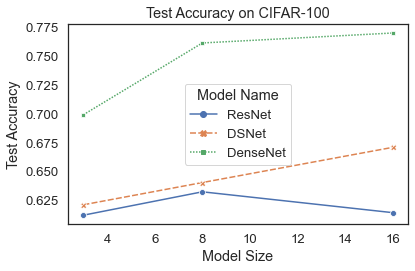

In [165]:
sns.set(font_scale = 1.2)
sns.set_style("white")
df3["Model Name"] = df3["model_name"]
df3["Model Name"][df3["Model Name"] == "DsNet"] = "DSNet"
df3["Model Size"] = df3["model_size"]
df3["Test Accuracy"] = df3["test_acc"]
f = sns.lineplot(data=df3.sort_values("hour_trained"), x="Model Size", y="Test Accuracy", hue="Model Name", style="Model Name", markers=True)
plt.title("Test Accuracy on CIFAR-100")
figure = f.get_figure()
figure.tight_layout()
figure.savefig('1_different_models.pdf')

Text(0.5, 1.0, 'Training time on CIFAR-100 (Hours)')

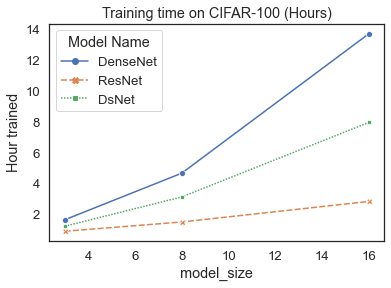

In [135]:
sns.set_style("white")
df3["Hour trained"] = df3["hour_trained"]
sns.lineplot(data=df3, x="model_size", y="Hour trained", hue="Model Name", style="Model Name", markers=True)
plt.title("Training time on CIFAR-100 (Hours)")

### Training Curves

In [167]:
# manually add Maryam's result to the df
resnet3_val_acc = [0.12, 0.1924, 0.2362, 0.2798, 0.3282, 0.3508, 0.3928, 0.4216, 0.434, 0.4404, 0.4626, 0.4666, 0.4872, 0.4908, 0.4982, 0.4992, 0.502, 0.5132, 0.503, 0.4856, 0.5108, 0.518, 0.517, 0.5174, 0.5254, 0.5138, 0.5276, 0.5352, 0.544, 0.535, 0.5532, 0.541, 0.5606, 0.5422, 0.561, 0.5474, 0.553, 0.5452, 0.5616, 0.5512, 0.5676, 0.5536, 0.5634, 0.5652, 0.564, 0.5522, 0.5602, 0.5744, 0.5568, 0.5696, 0.6104, 0.6096, 0.6196, 0.6156, 0.6068, 0.6074, 0.6162, 0.6104, 0.6156, 0.6084, 0.6198, 0.6144, 0.6212, 0.6182, 0.6174, 0.6104, 0.6122, 0.6138, 0.6204, 0.6184, 0.6164, 0.6162, 0.6212, 0.613, 0.6132, 0.6114, 0.6184, 0.6118, 0.6276, 0.6212, 0.6166, 0.618, 0.6176, 0.6108, 0.6148, 0.6212, 0.6252, 0.6194, 0.6194, 0.6272, 0.6262, 0.6216, 0.6186, 0.6186, 0.618, 0.6226, 0.6104, 0.6174, 0.6106, 0.619]
resnet8_val_acc = [0.0672, 0.1388, 0.199, 0.26, 0.32, 0.3346, 0.3744, 0.3974, 0.441, 0.4328, 0.4338, 0.4774, 0.4902, 0.4866, 0.5074, 0.5152, 0.5246, 0.52, 0.5136, 0.5456, 0.5426, 0.5374, 0.552, 0.5526, 0.551, 0.5562, 0.5436, 0.5544, 0.5726, 0.571, 0.5742, 0.5692, 0.5708, 0.574, 0.5664, 0.5518, 0.5806, 0.5658, 0.579, 0.5822, 0.5838, 0.5788, 0.5888, 0.5756, 0.5808, 0.583, 0.5872, 0.5922, 0.59, 0.5716, 0.6314, 0.6404, 0.6358, 0.6396, 0.6368, 0.6398, 0.638, 0.6346, 0.6358, 0.645, 0.6414, 0.6334, 0.6348, 0.6338, 0.6342, 0.6344, 0.64, 0.6406, 0.6414, 0.6358, 0.639, 0.6378, 0.6372, 0.6344, 0.6362, 0.6328, 0.6464, 0.6446, 0.6318, 0.6412, 0.6396, 0.643, 0.6294, 0.6448, 0.6418, 0.6378, 0.6458, 0.6334, 0.641, 0.6396, 0.64, 0.6374, 0.6436, 0.6316, 0.6402, 0.6464, 0.6342, 0.6416, 0.643, 0.6394]

dsnet3_val_acc = [0.1158, 0.1532, 0.2666, 0.314, 0.3532, 0.359, 0.4112, 0.4338, 0.4474, 0.4566, 0.457, 0.4594, 0.4906, 0.5016, 0.5162, 0.4994, 0.537, 0.5362, 0.5288, 0.5428, 0.5472, 0.5326, 0.541, 0.5486, 0.5476, 0.557, 0.5572, 0.561, 0.5718, 0.577, 0.5764, 0.5696, 0.5744, 0.5866, 0.5748, 0.5732, 0.5912, 0.5726, 0.5832, 0.583, 0.5862, 0.582, 0.59, 0.5918, 0.5864, 0.5968, 0.5988, 0.6024, 0.591, 0.611, 0.628, 0.6294, 0.6356, 0.6326, 0.6302, 0.6276, 0.6318, 0.638, 0.634, 0.6326, 0.6354, 0.6284, 0.63, 0.633, 0.6386, 0.628, 0.6408, 0.627, 0.6284, 0.625, 0.627, 0.6354, 0.6312, 0.63, 0.629, 0.6292, 0.6304, 0.6404, 0.6332, 0.6396, 0.6314, 0.6362, 0.6262, 0.6282, 0.6308, 0.6384, 0.6358, 0.628, 0.638, 0.6384, 0.6322, 0.6372, 0.6324, 0.6372, 0.63, 0.6354, 0.6332, 0.6382, 0.6336, 0.6472]
dsnet8_val_acc = [0.1384, 0.2228, 0.3124, 0.3434, 0.3772, 0.3962, 0.433, 0.4432, 0.466, 0.4692, 0.482, 0.5006, 0.5134, 0.5062, 0.528, 0.5402, 0.5388, 0.548, 0.5382, 0.5522, 0.5486, 0.5468, 0.569, 0.5724, 0.576, 0.5692, 0.5678, 0.5716, 0.5722, 0.5762, 0.597, 0.573, 0.5788, 0.5858, 0.5834, 0.5904, 0.5906, 0.5804, 0.6028, 0.592, 0.6004, 0.5904, 0.605, 0.58, 0.592, 0.5918, 0.6012, 0.5972, 0.6066, 0.5864, 0.6376, 0.6388, 0.6374, 0.6362, 0.6424, 0.6498, 0.6422, 0.645, 0.644, 0.6442, 0.6418, 0.6462, 0.6442, 0.646, 0.6498, 0.643, 0.6484, 0.6388, 0.6412, 0.6356, 0.6396, 0.636, 0.6348, 0.6316, 0.6378, 0.6442, 0.636, 0.6468, 0.6448, 0.6428, 0.6524, 0.6394, 0.6442, 0.6528, 0.6416, 0.643, 0.6402, 0.6456, 0.6396, 0.6402, 0.6372, 0.646, 0.6464, 0.6444, 0.6492, 0.644, 0.6388, 0.6386, 0.6528, 0.6382]

resnet16_train_acc = [0.01744, 0.05478, 0.09602, 0.14862, 0.19906, 0.2399, 0.27402, 0.30638, 0.33316, 0.35838, 0.3803, 0.4018, 0.42056, 0.43494, 0.45554, 0.46922, 0.48798, 0.50024, 0.51306, 0.52696, 0.53712, 0.54844, 0.5588, 0.56712, 0.57692, 0.5841, 0.59274, 0.603, 0.6092, 0.61798, 0.62228, 0.63024, 0.63798, 0.64106, 0.65014, 0.65702, 0.66068, 0.66738, 0.67182, 0.67588, 0.68354, 0.69012, 0.69394, 0.70028, 0.70338, 0.7055, 0.71112, 0.71632, 0.71908, 0.7236, 0.79828, 0.81864, 0.82804, 0.83166, 0.8352, 0.84142, 0.8436, 0.85046, 0.8496, 0.85156, 0.85378, 0.85442, 0.85824, 0.85934, 0.86194, 0.86568, 0.86728, 0.86708, 0.87122, 0.87238, 0.87136, 0.87196, 0.87536, 0.87758, 0.87796, 0.88674, 0.88584, 0.88896, 0.8888, 0.88818, 0.88812, 0.8904, 0.89098, 0.8903, 0.89258, 0.89072, 0.89236, 0.88984, 0.89194, 0.89266, 0.89226, 0.89268, 0.8941, 0.89304, 0.8943, 0.89598, 0.89452, 0.89478, 0.89432, 0.89456]
resnet16_val_acc = [0.027, 0.0846, 0.137, 0.168, 0.2394, 0.2534, 0.2982, 0.3166, 0.3344, 0.3542, 0.3864, 0.4016, 0.4158, 0.4116, 0.4358, 0.4426, 0.4342, 0.4762, 0.483, 0.4854, 0.4848, 0.5072, 0.5064, 0.5156, 0.506, 0.5148, 0.5138, 0.5182, 0.5326, 0.5278, 0.5484, 0.5294, 0.5314, 0.5028, 0.535, 0.5448, 0.546, 0.546, 0.5522, 0.5388, 0.5498, 0.5528, 0.5542, 0.5492, 0.5542, 0.5508, 0.5594, 0.5546, 0.5596, 0.5636, 0.6068, 0.6044, 0.6084, 0.61, 0.6122, 0.6094, 0.6026, 0.61, 0.6062, 0.6098, 0.6142, 0.6148, 0.6136, 0.6068, 0.6088, 0.6176, 0.6124, 0.6136, 0.603, 0.6082, 0.605, 0.6068, 0.6082, 0.6134, 0.613, 0.606, 0.6186, 0.61, 0.6172, 0.617, 0.6164, 0.6104, 0.611, 0.6128, 0.6184, 0.6064, 0.6144, 0.605, 0.6152, 0.614, 0.6096, 0.6096, 0.6084, 0.606, 0.6134, 0.6164, 0.6152, 0.6096, 0.6076, 0.6058]

dsnet16_train_acc = [0.08278, 0.19474, 0.26618, 0.32358, 0.37352, 0.4187, 0.45334, 0.48002, 0.5071, 0.52624, 0.54486, 0.56166, 0.57784, 0.58776, 0.60178, 0.61498, 0.62626, 0.64092, 0.64992, 0.65704, 0.66452, 0.67352, 0.68182, 0.69022, 0.69666, 0.70236, 0.71134, 0.71952, 0.72166, 0.73102, 0.73906, 0.73826, 0.74678, 0.74934, 0.75646, 0.75898, 0.76638, 0.76876, 0.7758, 0.77886, 0.78534, 0.79058, 0.79232, 0.79814, 0.80154, 0.80332, 0.80738, 0.80802, 0.81392, 0.81886, 0.8805, 0.90362, 0.91124, 0.9164, 0.92142, 0.92496, 0.9282, 0.93126, 0.932, 0.93278, 0.93768, 0.93746, 0.94004, 0.94112, 0.94278, 0.9431, 0.94438, 0.94626, 0.95014, 0.94886, 0.94974, 0.9524, 0.95298, 0.95428, 0.95324, 0.95772, 0.95962, 0.96138, 0.96058, 0.96138, 0.95882, 0.9626, 0.96328, 0.9618, 0.96124, 0.96354, 0.96456, 0.96246, 0.96396, 0.96238, 0.96326, 0.96354, 0.96428, 0.96456, 0.96408, 0.96426, 0.96476, 0.9648, 0.96366, 0.96464]
dsnet16_val_acc = [0.148, 0.2188, 0.3004, 0.338, 0.377, 0.4182, 0.4574, 0.4804, 0.4778, 0.5074, 0.5014, 0.5414, 0.5434, 0.54, 0.5582, 0.5638, 0.5472, 0.5602, 0.575, 0.5714, 0.5912, 0.5932, 0.5854, 0.6086, 0.5838, 0.6028, 0.6024, 0.6014, 0.5956, 0.6072, 0.6004, 0.5926, 0.6056, 0.6122, 0.6132, 0.6112, 0.6064, 0.622, 0.614, 0.6164, 0.614, 0.6138, 0.617, 0.6144, 0.6172, 0.6186, 0.6146, 0.6294, 0.6272, 0.6302, 0.67, 0.6646, 0.6744, 0.6714, 0.6694, 0.6682, 0.6688, 0.6742, 0.6754, 0.6594, 0.6768, 0.6694, 0.6788, 0.6654, 0.6768, 0.677, 0.6728, 0.668, 0.6722, 0.669, 0.6718, 0.674, 0.6672, 0.666, 0.6702, 0.673, 0.6732, 0.676, 0.676, 0.6718, 0.6802, 0.6726, 0.6778, 0.6768, 0.669, 0.6798, 0.6746, 0.6764, 0.6708, 0.6758, 0.6682, 0.674, 0.6714, 0.6804, 0.6752, 0.6704, 0.6754, 0.6806, 0.6762, 0.6756]

data = [
    (resnet3_val_acc, "ResNet_3_32_0.1"),
    (resnet8_val_acc, "ResNet_8_32_0.1"),
    (resnet16_val_acc, "ResNet_16_32_0.1"),    
    (dsnet3_val_acc, "DsNet_3_32_0.1"),
    (dsnet8_val_acc, "DsNet_8_32_0.1"),
    (dsnet16_val_acc, "DsNet_16_32_0.1"),      
]
model_names = set([d[1] for d in data])

maryam_training_logs = []

for (d, name) in data:
    logs = [
        {"exp_name": name, "val_acc": val_acc, "fold": 0, "epoch": i} \
        for i, val_acc in enumerate(d)
    ]
    maryam_training_logs.extend(logs)

df2 = combine_run_training_logs(os.path.join(RESULT_DIR, selected_dir))

# Manually change data
df2 = df2[df2["exp_name"].apply(lambda x: x not in model_names)]
df3 = df2.append(maryam_training_logs).reset_index()

df3["fold"] = df3["fold"].apply(int)
df3["train_acc"] = df3["train_acc"].apply(float)
df3["val_acc"] = df3["val_acc"].apply(float)
df3 = df3[df3["exp_name"].apply(lambda x: "12" not in x)]

df3["Model Name"] = df3["exp_name"].apply(lambda x: x.split("_")[0])
k = {"ResNet": 0, "DsNet": 1, "DenseNet": 2}
df3["key"] = df3["Model Name"].apply(lambda x: k[x])
df3 = df3.sort_values("key")

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3491638506.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df2.append(maryam_training_logs).reset_index()


In [168]:
# Graph
def graph_training_logs(exp_name: str, df):    
    df = df[df["exp_name"].apply(lambda x: exp_name in x)]
    # A bit hacky
    # df3["exp_name"] = df3["exp_name"] + "_train"
    # sns_pp = sns.lineplot(data=df3[df3["fold"] == 0],
    #                       x="epoch", y="train_acc", hue="exp_name")
    df["Validation Accuracy"] = df["val_acc"]
    df["Epochs"] = df["epoch"]    
    sns_pp = sns.lineplot(data=df[df["fold"] == 0],
                          x="Epochs", y="Validation Accuracy", hue="Model Name")
    
    return sns_pp

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3283627182.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Validation Accuracy"] = df["val_acc"]
/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3283627182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Epochs"] = df["epoch"]


<AxesSubplot:xlabel='Epochs', ylabel='Validation Accuracy'>

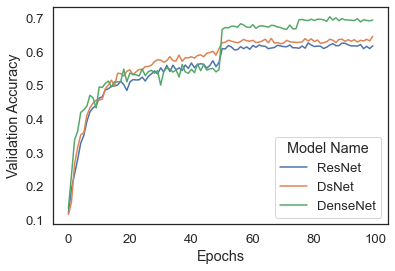

In [169]:
graph_training_logs("Net_3_32_0.1", df3)

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3283627182.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Validation Accuracy"] = df["val_acc"]
/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3283627182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Epochs"] = df["epoch"]


<AxesSubplot:xlabel='Epochs', ylabel='Validation Accuracy'>

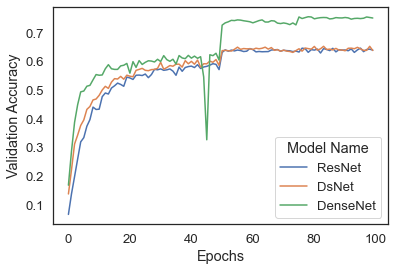

In [170]:
graph_training_logs("Net_8_32_0.1", df3)

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/340523777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Model Name"][df3["Model Name"] == "DsNet"] = "DSNet"
/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3283627182.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Validation Accuracy"] = df["val_acc"]
/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/3283627182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

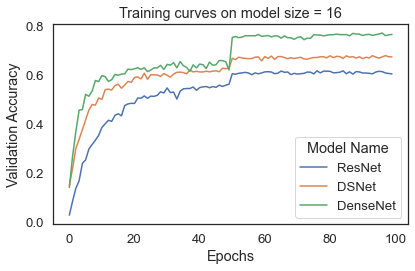

In [171]:
sns.set(font_scale = 1.2)
sns.set_style("white")
df3["Model Name"][df3["Model Name"] == "DsNet"] = "DSNet"
f = graph_training_logs("Net_16_32_0.1", df3)
plt.title("Training curves on model size = 16")
figure = f.get_figure()
figure.tight_layout()
figure.savefig('1_training_curves_model_n_16.pdf')

In [90]:
# graph_training_logs("ResNet_", df3)

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/4099034978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_name"] = df["exp_name"] + "_val"


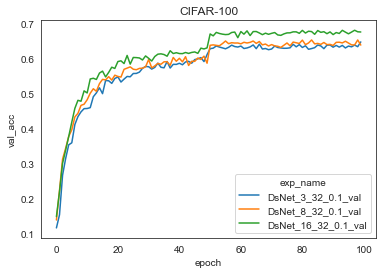

In [54]:
df4 = df3[df3["exp_name"].apply(lambda x: "32_0.1" in x)]
graph_training_logs("DsNet_", df4)

/var/folders/m2/659rrfsx63db1lpvyxrqtf9h0000gn/T/ipykernel_17222/4099034978.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exp_name"] = df["exp_name"] + "_val"


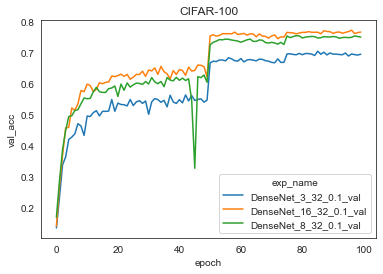

In [55]:
df4 = df3[df3["exp_name"].apply(lambda x: "32_0.1" in x)]
graph_training_logs("DenseNet", df4)